## Övning 1 Pandas Fundamentals

In [3]:

# 1.a) Create a Pandas Series from scratch

import pandas as pd

city = pd.DataFrame()

city= city.assign(Kommun = ["Malmö", "Stockholm", "Uppsala", "Göteborg"],
                Population = [347949, 975551, 233839, 583056])

city

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [4]:
# 1.b) Show the city with the index 3

gothenburg = city.iloc[[3]]

gothenburg

,Kommun,Population
3,Göteborg,583056


In [5]:
# 1.c) Sort the cities by population from largest to smallest

sorted_cities = city.sort_values("Population", ascending=False)

sorted_cities

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [6]:
# 1.d) Filter out the three largest cities

sorted_cities = city.sort_values("Population", ascending=False)

sorted_cities.head(3)

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [7]:
# 1.e) Assing population percentage to each city

sorted_cities["Population (%)"] = round(city["Population"] / 10379295 * 100, 1)

sorted_cities



,Kommun,Population,Population (%)
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


## Övning 2 Real Dataset

In [64]:
# 2.a) Read in data from an Excel file

import pandas as pd
file = "../../Data/komtopp50_2020.xlsx"
df = pd.read_excel(file, header = 0, sheet_name="Totalt")

print(df.head()) # Visar de 5 första raderna
print(df.info()) # Visar information om data, som datatyp och antal saknade värden
print(df.describe()) #Visar en sammanfattning av data, som medelvärde och standardavvikelse



                                          Unnamed: 0  Unnamed: 1 Unnamed: 2  \
0                                                NaN         NaN        NaN   
1  Folkmängd per kommun 31 december 2020 jämfört ...         NaN        NaN   
2  Sorterat i alfabetisk ordning. Rangordning frå...         NaN        NaN   
3                                                NaN         NaN        NaN   
4                                               Rang         NaN     Kommun   

              Unnamed: 3  Unnamed: 4  Unnamed: 5  
0                    NaN         NaN         NaN  
1                    NaN         NaN         NaN  
2                    NaN         NaN         NaN  
3                    NaN         NaN         NaN  
4  Folkmängd 31 december         NaN  Förändring  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    

In [65]:
# 2.b) Change the column names and drop rows with missing values

df.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]

pd.to_numeric(df["Förändring"], errors="coerce")
df = df.dropna()
df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(int)
df["Rang 2019"] = df["Rang 2019"].astype(int)

df.head().reset_index(drop=True)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.34074


In [66]:
# 2.c) Filter out the five largest cities, from largest to smallest

sorted_cities = df.sort_values("Folkmängd 2020", ascending=False)

sorted_cities.head().reset_index(drop=True)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.65167
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


In [67]:
# 2.d) Assing population percentage to each city

sorted_smalest_city = df.sort_values("Folkmängd 2020")

sorted_smalest_city.set_index("Rang 2020")
sorted_smalest_city.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
18,290,290,Bjurholm,2387,2408,-0.872093
200,289,289,Sorsele,2442,2489,-1.888309
35,288,288,Dorotea,2498,2551,-2.077617
11,287,287,Arjeplog,2718,2785,-2.405745
277,286,286,Åsele,2805,2794,0.393701


In [68]:
# 2.e) Calculate the population in Sweden in 2019 and 2020

population_2019 = df["Folkmängd 2019"].sum()
population_2020 = df["Folkmängd 2020"].sum()

print(f"The population in Sweden in 2019 was {population_2019} and in 2020 was {population_2020}." ) # f-formatting string






The population in Sweden in 2019 was 10327589 and in 2020 was 10379295.


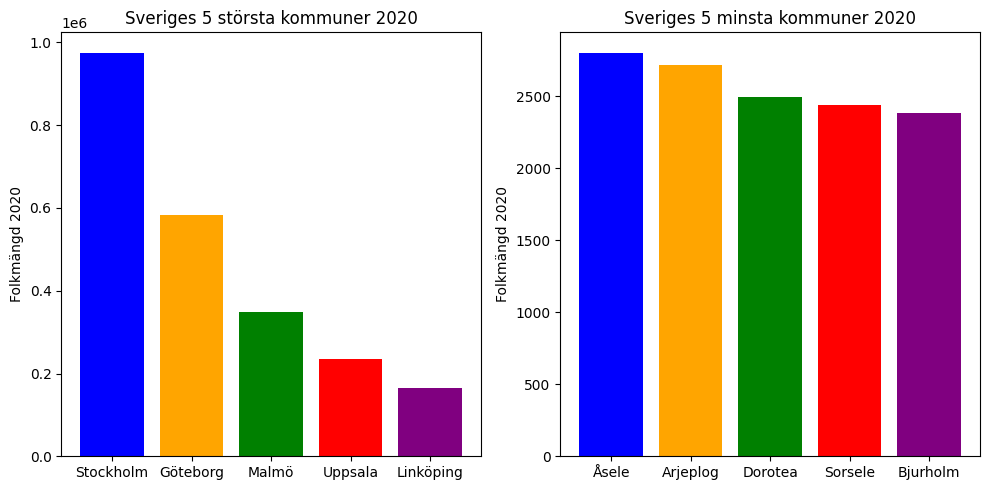

In [69]:
# 2.f) Plot the 5 largest cities, and the 5 smallest

import matplotlib.pyplot as plt

df_sorted = df.sort_values("Folkmängd 2020", ascending=False)
largest_cities = df_sorted.head(5)
smallest_cities = df_sorted.tail(5)


plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.bar(largest_cities["Kommun"], largest_cities["Folkmängd 2020"], color=["blue", "orange", "green", "red", "purple"])
plt.title("Sveriges 5 största kommuner 2020")
plt.ylabel("Folkmängd 2020")

plt.subplot(1, 2, 2)
plt.bar(smallest_cities["Kommun"], smallest_cities["Folkmängd 2020"], color=["blue", "orange", "green", "red", "purple"])
plt.title("Sveriges 5 minsta kommuner 2020")
plt.ylabel("Folkmängd 2020")
plt.tight_layout()
plt.show()



## Uppgift 3 Cities in Sweden - Gender

In [71]:
import pandas as pd

# Läs in data från Excel-fil
df_dict = pd.read_excel("../../Data/komtopp50_2020.xlsx", sheet_name=["Män", "Kvinnor"])

# Definiera funktionen för att rensa och om döpa kolumnerna
def rensa_och_omdöpa(df):
    # Rensa upp datan
    df = df.dropna()  # Ta bort rader med saknade värden
    df = df.drop_duplicates()  # Ta bort dubblettrader

    # Uppdatera namnen på kolumnerna
    df = df.assign(
        Rang_2020=df.iloc[:, 0],
        Rang_2019=df.iloc[:, 1],
        Kommun=df.iloc[:, 2],
        Folkmängd_2020=df.iloc[:, 3],
        Folkmängd_2019=df.iloc[:, 4],
        Förändring=df.iloc[:, 5],
        
    )

    return df

# Kör funktionen på DataFrame-objekten
df_kvinnor = rensa_och_omdöpa(df_dict['Kvinnor'])
df_man = rensa_och_omdöpa(df_dict['Män'])

# Skriv ut de uppdaterade DataFrame-objekten
print(df_kvinnor)
print(df_man)

    Unnamed: 0  Unnamed: 1    Unnamed: 2 Unnamed: 3  Unnamed: 4 Unnamed: 5  \
6           84        85.0           Ale      15612     15348.0   1.720094   
7           64        64.0      Alingsås      20900     20774.0   0.606527   
8          123       123.0       Alvesta       9857      9795.0   0.632976   
9          255       255.0         Aneby       3318      3350.0  -0.955224   
10         165       164.0        Arboga       6945      6973.0  -0.401549   
..         ...         ...           ...        ...         ...        ...   
291         55        57.0     Österåker      22997     22442.0   2.473042   
292        117       118.0     Östhammar      10846     10803.0   0.398038   
293        160       159.0  Östra Göinge       7270      7262.0   0.110162   
294        284       284.0     Överkalix       1559      1578.0  -1.204056   
295        279       279.0    Övertorneå       2027      2065.0  -1.840194   

    Rang_2020  Rang_2019        Kommun Folkmängd_2020  Folkmäng